<a href="https://colab.research.google.com/github/InsightfulSantosh/ML_Algo_from_scratch/blob/main/LinearRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Derivation of Linear Regression in Machine Learning:**

Linear regression is one of the simplest and most commonly used algorithms in machine learning. The goal is to model the relationship between a dependent variable $(y)$ and one or more independent variables $(x_1, x_2, \dots, x_n)$. Below, we go through the derivation of linear regression step by step.

#### 1. **Linear Regression Model**

The basic form of the linear regression model for one dependent variable $(y)$ and independent variable $(x)$ is:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Where:
- $(y)$ is the dependent variable (target variable).
- $(x)$ is the independent variable (feature).
- $(\beta_0)$ is the intercept of the line (bias term).
- $(\beta_1)$ is the slope (coefficient of the independent variable).
- $(\epsilon)$ is the error term or residual, which accounts for the difference between the actual and predicted values.

For multiple linear regression (with multiple features), the model becomes:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

In matrix form, this can be written as:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Where:
- $(\mathbf{y})$ is an $(m \times 1)$ vector of observations.
- $(\mathbf{X})$ is an $(m \times (n+1))$ matrix with $(m)$ observations and $(n)$ features, including a column of 1s for the intercept.
- $(\boldsymbol{\beta})$ is an $((n+1) \times 1)$ vector of coefficients.
- $(\boldsymbol{\epsilon})$ is an $(m \times 1)$ vector of residuals.

#### 2. **Objective: Minimize the Cost Function (Ordinary Least Squares)**

The goal is to estimate the parameters $(\boldsymbol{\beta})$ by minimizing the residual sum of squares (RSS). The RSS is the squared difference between the predicted value $(\hat{y})$ and the actual value $(y)$.

The cost function, or the objective function, in linear regression is the **Mean Squared Error** (MSE), but often we use the Residual Sum of Squares (RSS), which is a sum of squared errors:

$$
\text{RSS} = \sum_{i=1}^m (y_i - \hat{y_i})^2
$$

Substituting $(\hat{y_i} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)$, we can write RSS as:

$$
\text{RSS} = \sum_{i=1}^m \left(y_i - (\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)\right)^2
$$

In matrix form:

$$
\text{RSS} = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})
$$

#### 3. **Derivation: Finding the Optimal $(\boldsymbol{\beta})$**

To minimize the cost function, we take the derivative of the RSS with respect to $(\boldsymbol{\beta})$ and set it equal to zero. This is known as the method of **Ordinary Least Squares (OLS)**.

$$
\frac{\partial \text{RSS}}{\partial \boldsymbol{\beta}} = 0
$$

Expanding the derivative:

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \left( (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) \right)
$$

Using the chain rule:

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \left( \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right)
$$

Taking the derivatives:

$$
-2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = 0
$$

Simplifying:

$$
\mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y}
$$

This is known as the **Normal Equation**. Solving for $(\boldsymbol{\beta})$:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

#### 4. **Interpretation of the Solution**

- $(\boldsymbol{\beta})$ represents the vector of coefficients (parameters) for the linear regression model.
- $(\mathbf{X}^T \mathbf{X})$ is the matrix of covariances between the features.
- $((\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T)$ can be interpreted as the "pseudo-inverse" of $(\mathbf{X})$, and it gives the least squares estimate of the model parameters.

#### 5. **Limitations of OLS**

- **Multicollinearity**: If the features are highly correlated, $(\mathbf{X}^T \mathbf{X})$ becomes nearly singular, making the inversion unstable.
- **Outliers**: OLS is sensitive to outliers, as it minimizes the squared error, which can give disproportionate weight to outliers.

### Conclusion

Linear regression minimizes the sum of squared residuals to find the optimal $(\boldsymbol{\beta})$, using the normal equation:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This derivation shows how the algorithm learns the coefficients of the line (or hyperplane in multiple dimensions) that best fits the data.


In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load and prepare the dataset
df = pd.read_csv("/content/kc_house_data.csv")
dell = ["id", "date"]
df = df.drop(dell, axis=1).dropna()

X = df.drop(columns="price",axis=1)  # Features
y = df["price"]  # Target (house price)

# Split data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)


In [112]:
# Custom Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        print("Model fitted Sucsesfully")

    def predict(self,X_test):
        # Transpose the coefficient vector to align the shapes for matrix multiplication
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

    def score(self,X_test,y_test):
        # Pass X_test to the predict method instead of y_test
        y_pred = self.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        return r2


In [113]:
# Train and Predict using Custom Model
custom_model = LinearRegression()
custom_model.fit(train_x_scaled, train_y)
custom_predictions = custom_model.predict(test_x_scaled)

# Train and Predict using sklearn Model
sklearn_model = SklearnLR()
sklearn_model.fit(train_x_scaled, train_y)
sklearn_predictions = sklearn_model.predict(test_x_scaled)

# Compute R^2 score and MSE for Custom Model
custom_r2_score = r2_score(test_y, custom_predictions)
custom_mse = mean_squared_error(test_y, custom_predictions)
# Pass test_x_scaled to score instead of test_y
custom_score = custom_model.score(test_x_scaled, test_y)


# Compute R^2 score and MSE for sklearn Model
sklearn_r2_score = r2_score(test_y, sklearn_predictions)
sklearn_mse = mean_squared_error(test_y, sklearn_predictions)

# Print results
print("Custom Model Predictions:", custom_predictions[:5])  # Print first 5 predictions
print("Sklearn Model Predictions:", sklearn_predictions[:5])  # Print first 5 predictions

print("Custom Model R^2 score:", custom_r2_score)
print("Custom Model Score:", custom_score)
print("Custom Model MSE:", custom_mse)

print("Sklearn Model R^2 score:", sklearn_r2_score)
print("Sklearn Model MSE:", sklearn_mse)

Model fitted Sucsesfully
Custom Model Predictions: [ 549113.35035652  500832.32487102 1047139.50044086  322403.37527615
  391406.34799073]
Sklearn Model Predictions: [ 523007.17797173  448346.63588045 1161295.01830245  268245.16389645
  357926.09001861]
Custom Model R^2 score: 0.6845092703112914
Custom Model Score: 0.6845092703112914
Custom Model MSE: 38365654347.31412
Sklearn Model R^2 score: 0.6980902130078133
Sklearn Model MSE: 36714126412.65961


Model fitted Sucsesfully


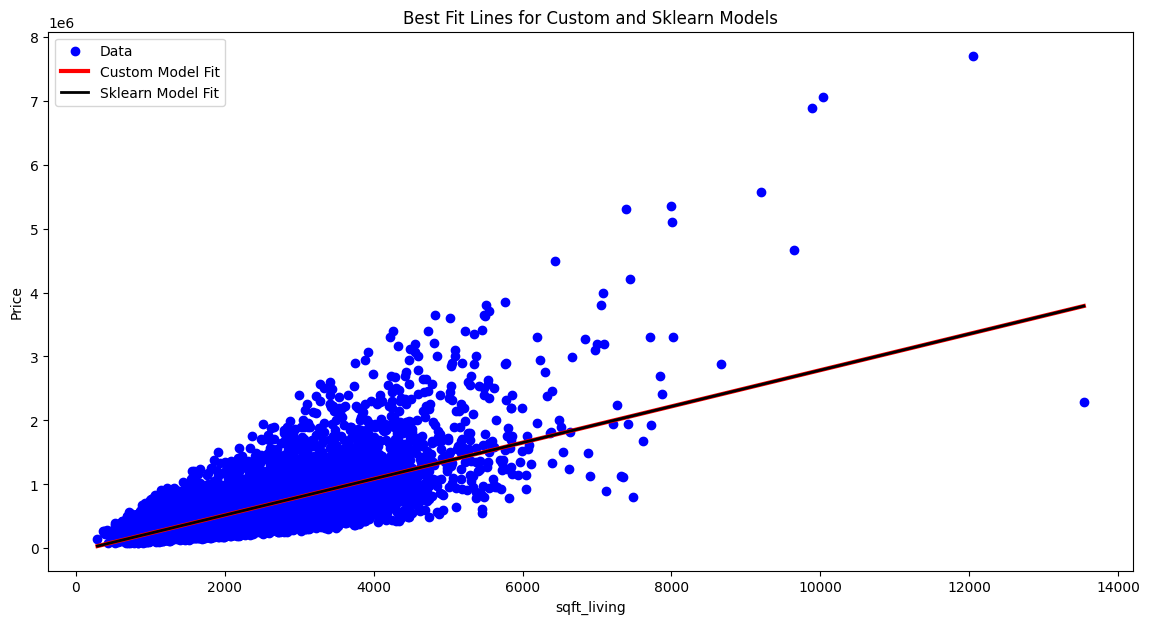

In [116]:
# Select a single feature for demonstration
feature = 'sqft_living'  # Example feature
X = df[[feature]]  # Features
y = df["price"]  # Target (house price)

# Split data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)


# Train both models
custom_model2 = LinearRegression() # Use a new model instance for this single feature
custom_model2.fit(train_x_scaled, train_y)

sklearn_model2 = SklearnLR()
sklearn_model2.fit(train_x_scaled, train_y)

# Make predictions using the entire feature range for plotting
X_range = np.linspace(train_x_scaled.min(), train_x_scaled.max(), 100).reshape(-1, 1)
X_range_original = scaler.inverse_transform(X_range)  # Transform back to original scale

custom_predictions = custom_model2.predict(X_range) # Use the new model instance for prediction
sklearn_predictions = sklearn_model2.predict(X_range)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the original data
plt.scatter(train_x, train_y, color='blue', label='Data')

# Plot the best fit lines
plt.plot(X_range_original, custom_predictions, color='red', label='Custom Model Fit', linewidth=3)
plt.plot(X_range_original, sklearn_predictions, color='black', label='Sklearn Model Fit', linewidth=2)

plt.xlabel(feature)
plt.ylabel('Price')
plt.title('Best Fit Lines for Custom and Sklearn Models')
plt.legend()
plt.show()

In [115]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
